In [39]:
import random
import os
import os.path as osp
import pandas as pd
from PIL import Image
import numpy as np
from skimage.measure import regionprops
from skimage.transform import swirl
import cv2 as cv2
import pathlib
import imageio
import matplotlib.pyplot as plt

def patch_aug(imga,gt):
    imga_1 = np.asarray(imga)
    gt_1 = np.asarray(gt)
    l = 0
    #print(np.shape(imga_1)[0]*0.1)
    m = np.shape(imga_1)[0]*0.4
    while l < m: #int(np.shape(imga_1)[0]*0.4):
        r = random.randint(1,60)
        k = random.randint(60,np.shape(imga)[0]-100)
        t = random.randint(60,np.shape(imga)[1]-100)
        #print(np.max(gta_1[:,k:k+r,t:t+r]))
        #print(np.shape(imga_1))
        #print(np.shape(gta_1))
        if (((k+r)<np.shape(imga)[0]) and ((t+r)<np.shape(imga)[1])) and (np.max(gt_1[k:k+r,t:t+r])==0):
           l = l+1
           imga_1[k:k+r,t:t+r,:] = imga_1[k:k+r,t:t+r,:]*np.random.uniform(0.5,1)
           cx = int(r/2)
           cy = int(r/2)
           angle = 0
           dist = int(r/2)
           amount= random.randint(0,10)
           #if (random.randint(0,1)==1):
           #   imga_1[k:k+r,t:t+r,:] = cv2.flip(imga_1[k:k+r,t:t+r,:],0)
           #if (random.randint(0,1)==1):
           #   imga_1[k:k+r,t:t+r,:] = cv2.flip(imga_1[k:k+r,t:t+r,:],1)           
           imga_1[k:k+r,t:t+r,:] = swirl(imga_1[k:k+r,t:t+r,:], center=(cx,cy), rotation=angle, strength=amount, radius=dist, preserve_range=True).astype(np.uint8)
           #imga_1[k:k+r,t:t+r,:] = random_vessel_augmentation(imga_1[k:k+r,t:t+r,:], prob=0, order='RGB')
    return(imga_1)

In [40]:
img = cv2.imread('CHASEDB\CHASEDB\images\Image_01L.jpg')
image = img[:, :, ::-1]

Text(0.5, 1.0, 'Original image')

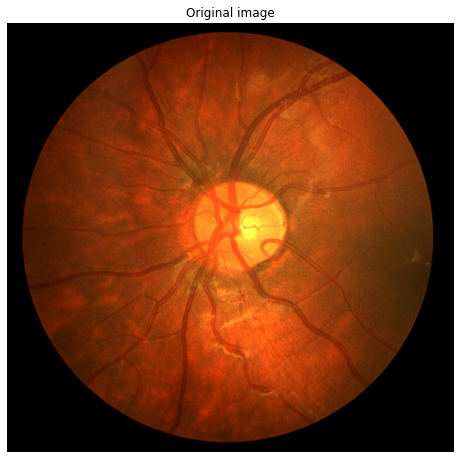

In [41]:
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title('Original image')

In [42]:
gt = cv2.imread("CHASEDB\CHASEDB\manual\Image_01L_1stHO.png")

In [43]:
mask= cv2.imread("CHASEDB\CHASEDB\masks\Image_01L.gif")

In [44]:
aug = patch_aug(img,gt)

C:\Users\Prateek Jeet Singh\anaconda3\lib\site-packages\skimage\transform\_warps.py:518: RuntimeWarning: invalid value encountered in true_divide
  np.exp(-rho / radius) + \


Text(0.5, 1.0, 'augmented VIPs image')

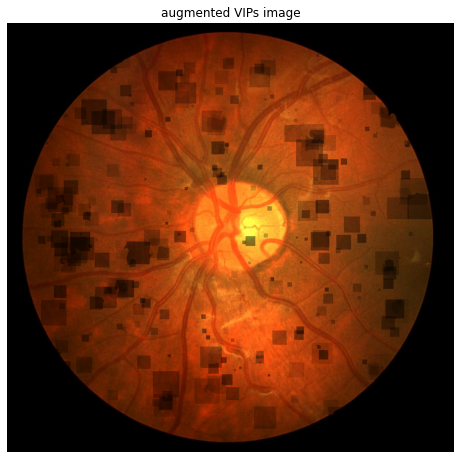

In [46]:
vips = aug[:, :, ::-1]
plt.figure(figsize=(8, 8))
plt.imshow(vips)
plt.axis('off')
plt.title('augmented VIPs image')